
## FINANCIAL ECONOMETRICS
MODULE 1 | LESSON 4

---

# **MEASUREMENT ERRORS AND FACTOR ANALYSIS**



|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** |  Linear Algebra, Linear Regression, Principal Component Analysis |
|**Keywords** |Measurement Error, Exploratory Factor Analysis, Confirmatory Factor Analysis, Factors/Latent Variables, Common Variance/Communality, Unique Variance, Loadings, Varimax Rotation, Promax Rotation |


---

*In previous lessons, we assumed that the data we get are always accurate. In reality, the collected values of the data we get can be different from the actual values of the data. This difference is called measurement error. In this lesson, we will examine the impact of measurement error in a linear regression model. With the knowledge of measurement error, we will be able to discuss the next topic: factor analysis. Factor analysis is an analytical method to understand the behavior of the observed dataset we get. We will also learn how to use factor analysis to model measurement error. Factor analysis is another popular method to reduce the data dimension.*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn import preprocessing

plt.rcParams["figure.figsize"] = (12, 9)

ModuleNotFoundError: No module named 'factor_analyzer'

## **1. Measurement Error**

### **1.1 Overview**

What is measurement error? **Measurement error** arises when the measured values of the data are different from the true values of the data. One example is when we measure our weight on a scale, the measured number on the scale can be incorrect. The read can be five pounds more or less than the actual weight. We would take the measurement several times and calculate the average. Then, we use the average as the final weight. The difference between each measurement and the average is the measurement error. This is a situation when the instrument or method of measurement is not precise.

Another situation where measurement error can occur is when a variable is a conceptual idea but difficult to quantify or observe. For example, when we try to evaluate how strong a country’s economy is, the first variable we usually come up with is GDP, but GDP only evaluates transacted goods, not the labor situation. You might want to include employment rate and other measures in your analysis. Following that logic, you might collect a number of variables to approximate a country’s economy performance. However, there is still a difference between the economy’s performance and the combined effect of the selected variables.

Measurement error can be divided into two types of errors: systematic error and random error. **Systematic error** is an error that can be identified. The above examples are all identifiable errors, like inaccurate instruments or imperfect proxies. **Random error** is the error we cannot identify, even after correcting all identifiable errors. It is an error that always exists in measurements and fluctuates. What we can do is take many measurements and use the average to even out the fluctuation.

### **1.2 Impact of Measurement Error in Linear Regression**

Now, let’s look at the variables with measurement error in a linear regression model. What can happen to coefficient estimates when variables in a linear regression model have measurement errors? 

#### **1.2.1 Dependent Variable with Measurement Error**

If the dependent variable in a linear regression has measurement error, the coefficient estimates are still unbiased. However, the variances of the coefficient estimates will be larger and the confidence intervals for coefficient estimates will be wider. Hence, the estimates will be less stable. Figure 1 shows the consequence of a dependent variable with measurement error and the confidence intervals. The blue dotted line is the confidence interval without measurement error. The red dotted line represents the confidence interval with measurement error.

**Figure 1: Dependent Variable and Measurement Error in a Linear Regression Model**


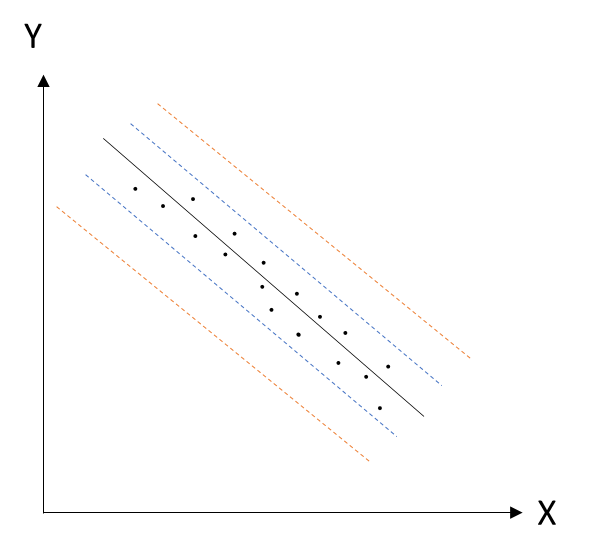



#### **1.2.2 Independent Variables with Measurement Error**

If an independent variable in a linear regression has measurement error, the coefficient estimate of the independent variable will be biased. Figure 2 demonstrates different regression lines for the independent variable with and without measurement error. The black solid line is the independent variable without measurement error. The black dotted line is the independent variable with measurement error. We can see now that the slope for the black solid line and the slope for the black dotted line are different. The slopes represent coefficient estimates for two linear regression models.

**Figure 2: Independent Variable and Measurement Error in a Linear Regression Model**

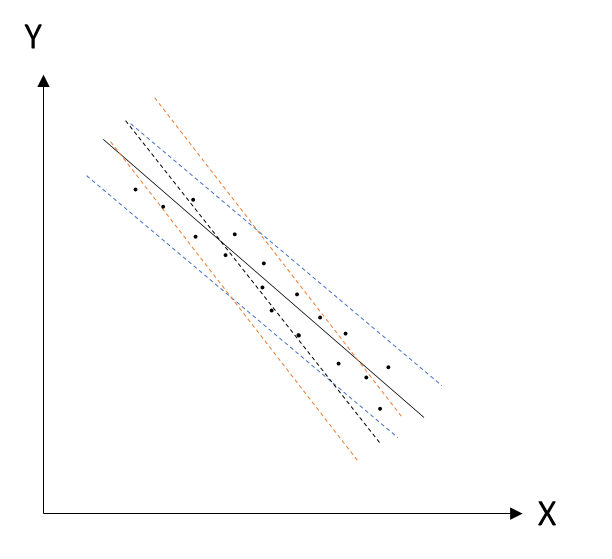



#### **1.2.3 What Do You Do with Measurement Errors?**

We know part of the reasons measurement error exists is because we are using a number of variables as a proxy for an idea or a concept, as described in the last section. Measurement error is the difference between the proxy value and the true value. From the example in the last section, a country’s economy performance is evaluated by using a number of measured variables. To look at the method in a different way, these measured variables are all influenced by a variable that we cannot directly measure. The measurement error is the difference between this unmeasurable variable and the combined measurable variables. If we can find an analytical tool to model this relationship, we can model the measurement error. This analytical tool is **factor analysis.** We are going to talk about factor analysis in the next section.

## **2. Factor Analysis**

### **2.1 Factors and Latent Variables**

Before discussing factor analysis, we would like to introduce a few key terms. In the last section, we talked about using several measurable variables to approximate the unmeasurable variable. To look at this relationship in another way, we can say that the unmeasurable variable also has influence on the several measurable variables. We call the measurable variables or observed variables **indicators**. We call the unmeasurable variable a **factor**. A **factor** is an unobserved variable that can influence the variances of observed variables. Since we cannot observe a factor, we also call it a **latent variable.** Assuming we have three indicators ($Y_1$, $Y_2$, and $Y_3$) and one latent variable ($F_1$), we can illustrate their relationship as the following linear relationship:

$$
\begin{align}
  Y_1 &= b_1  F_1 + \varepsilon_1  \\
  Y_2 &= b_2  F_1 + \varepsilon_2 \\
  Y_3 &= b_3  F_1 + \varepsilon_3
\end{align} 
$$

From the above linear system, we can see $F_1$ is the common factor for the three indicators. The total variance of an indicator can be split between **common variance** and **unique variance**. The **common variance** is the variance that is explained by the factor. We also call common variance **communality**. The **unique variance** is the indicator’s specific variance. In our example above, the common variance for $Y_1$ is the variance explained by $F_1$. The unique variance is the variance explained by $\varepsilon_1$ which is the measurement error we discussed in the last section. Hence, this system can let us model both factors shared among indicators and indicators’ specific measurement error.

There can be several factors that influence indicators. If there are two factors ($F_1$ and $F_2$) influencing $Y_1$, $Y_2$, and $Y_3$, we can write our linear system as follows:

$$ 
\begin{align}
  Y_1 &= b_1 F_1 + c_1 F_2 + \varepsilon_1 \\
  Y_2 &= b_2 F_1 + c_2 F_2 + \varepsilon_2 \\
  Y_3 &= b_3 F_1 + c_3 F_2 + \varepsilon_3
\end{align}  
$$

The coefficients $b_1$, $b_2$, $b_3$, $c_1$, $c_2$, and $c_3$ are called **factor loadings** or **loadings**. Loadings tell us which indicators are dominant for a factor.

### **2.2 Basics of Factor Analysis (Exploratory Factor Analysis)**

There are two types of factor analysis: exploratory factor analysis and confirmatory factor analysis. Exploratory factor analysis is used to find possible factors underlying a group of indicators without assuming any structure of the factors. Confirmatory factor analysis is applied to test hypothetical structures of factors on indicators. In this class, we will focus on exploratory factor analysis (EFA). 

Why do we need to use factor analysis? As we described above, we can now model measurement error. The main reason most researchers use factor analysis is to find and use factors to understand a group of variables. A researcher may have a large number of variables to investigate; factor analysis will help find a few key factors to explain the whole group of variables. The number of factors will be less than the number of the initial variables. Therefore, factor analysis is frequently used to reduce the number of variables. Factor analysis is also a technique to **reduce the dimension** of a dataset. 

The general form of a factor analysis model looks like the following:

$$
\begin{align} 
    Y_1 &= b_{11} F_1 + b_{12} F_2 + … + b_{1m} F_m +  \varepsilon_1  \\ 
    Y_2 &= b_{21} F_1 + b_{22} F_2 + … + b_{2m} F_m +  \varepsilon_2  \\ 
    Y_3 &= b_{31} F_1 + b_{32} F_2 + … + b_{3m} F_m +  \varepsilon_3  \\ 
    & \ \ \vdots \\
    Y_n &= b_{n1} F_1 + b_{n2} F_2 + … + b_{nm} F_m +  \varepsilon_n
\end{align} 
$$

In the above model, there are $n$ indicators and $m$ factors. ($b_{11}$, $b_{21}$, $b_{31}$, … $b_{n1}$) are the factor loadings for factor 1. The goal of factor analysis is to determine the optimal number of factors to explain the variables, estimate the loadings, and provide possible ideas to form groups of variables using the information from factors.

### **2.3 An Example of Factor Analysis**

The best way to understand how factor analysis works is to look at an example. We will continue to use our *KO* excess return model example. In the model, we have the following eight independent variables:

> *Dow 30* excess return \\
Pepsi stock excess return \\
*KO* revenue growth \\
Google stock excess return \\
Bank of America stock excess return \\
Walmart stock excess return \\
General Electric stock excess return \\
Starbucks stock excess return

By using factor analysis, we would like to find fewer than eight factors, and the factors can explain the most variance from the eight independent variables.


First we need to standardise our data. 

In [3]:
# Download the dataset and standardise
data_set = pd.read_csv("../fin_data_set.csv")
data = data_set[
    [
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
data_normal = preprocessing.StandardScaler().fit_transform(data)
df = pd.DataFrame(data_normal, columns=[data.columns])

NameError: name 'preprocessing' is not defined

#### **Adequacy Tests**

Before going ahead with Factor analysis we need to verify whether the data is suitable to apply factor analysis concepts. For this we run the data through following tests: 

* Correlation 
* Bartlett’s Test
* Kaiser-Meyer-Olkin (KMO) Test

**Correlation** - First step is to check correlation of all the variables. If some variables are highly correlated we will drop them.

As we see from below results we do not have extremely high correlation between our variables in our example.


In [ ]:
# Correlation plot of all the variables
c = df.corr()
sns.heatmap(c, annot=True)
plt.show()

**Bartlett’s Test** - Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, we should not employ a factor analysis. p-value less than 0.05 in our example below indicates statistically significant test.

In [ ]:
# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("chi_square_value =", chi_square_value, "\np_value =", p_value)

**Kaiser-Meyer-Olkin (KMO) Test** - It is a statistic that indicates the proportion of variance in our variables that might be caused by underlying factors. High values (close to 1.0) generally indicate that a factor analysis may be useful with our data. If the value is less than 0.50, the results of the factor analysis probably won’t be very useful.

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df)
print("kmo_model =", kmo_model)

#### **Performing factor analysis**

Our data passed all adequacy test and we can go ahead with performing Factor Analysis. For choosing right number of factors we first need to take all 8 factors and find Eigenvalues.

In [ ]:
# Create 8-factor object and fit data
fa1 = FactorAnalyzer(8, rotation=None)
fact_res = fa1.fit(df)

In [ ]:
# Check Eigenvalues
ev, v = fact_res.get_eigenvalues()
ev

We can visualize Eigenvalues by plotting Scree plot:

In [ ]:
# Visualize eigenvalues on scree plot
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title("Scree Plot", {"size": 16})
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

How do we decide how many factors to consider in the final model? Results of eigenvalues and visualized Scree plot help us decide number of factors. In the Scree plot we can see that 3 eigenvalues are greater than 1 which in itself means that we need to chose 3-factor model. 

The following code performs 3-factor analysis:

In [ ]:
# Create 3-factor object and fit data
fa3 = FactorAnalyzer(3, rotation=None)
fact_res3 = fa3.fit(df)

In [ ]:
# Get uniquenesses
pd.DataFrame(
    fact_res3.get_uniquenesses(), index=[data.columns], columns=["uniquenesses"]
)

In [ ]:
# Loadings
Loadings = pd.DataFrame(
    fact_res3.loadings_,
    index=[data.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)
print("Factor Loadings")
Loadings

In [ ]:
# Get proportion variance and cumulative proportion variance
variances = pd.DataFrame(
    fact_res3.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

print("Factor variances")
variances

Let’s look what the results tell us. The first section of the result is uniqueness. There is a number for each variable under uniqueness. This number is the ratio of unique variance over total variance of a variable, meaning how much of the total variance that this 3-factor model cannot explain. For Dow 30 excess return, the uniqueness is 0.079. It means there is only 7.9% of the total variance of the Dow 30 excess return that this 3-factor model cannot explain. It is a good result for the Dow 30 excess return. For Starbucks's excess return, the uniqueness is 0.837. It means that there is 83.7% of the variance of the Starbucks excess return that this 3-factor model cannot explain. This 3 factor model does a poor job for Starbucks's excess return. The ratio of the communality over the total variance of a variable is 1, uniqueness by definition. For example, Pepsi’s ratio of communality over total variance is 1 – 0.264 = 0.736. It means the 3-factor model can explain 74% of Pepsi’s total variance.

Next, let’s look at the loadings. The loading for Dow 30 excess return from factor 1 is 0.92. Factor 1 very well explains all the variance from Dow 30 excess return. Factor 1 also explains variances for Google's excess return and Bank of America's excess return pretty well. Factor 1 does poorly in explaining Walmart's and Starbucks's excess return variation.

For our example factor 1, Dow 30, Google and Bank of America have high loadings. For factor 2, Walmart and Pepsi have a high loading. For factor 3, KO’s revenue growth has the highest loading.

Let’s now look at Sum of Squared loadings and Proportional variances. Proportional variance gives a ratio that indicates how much a factor explains the variance of all eight variables. For example, factor 1 explains 39.6% of the variance of the eight variables. Factor 2 explains 15% of the variance of the eight variables. Cumulative var shows the cumulative ability of the factors to explain the variance of eight variables. For example, factor 1 and factor 2 combined explain 55% of the variance of eight variables. The 3-factor model explains a total of 67% of the variance of eight variables. 


### **2.4 Rotation**

One of the good things about factor analysis is that you can rotate the axes of the factors. Rotation usually makes only one factor highly associated with one or a small amount of initial variables. It simplifies the factor-variable structure and helps with interpretation of the factors. Rotation will not change the model results as to how much the model explains the total variance of the whole variables. 

There are two types of rotation methods to choose from. The first one is called **varimax**. Varimax rotates the axes to make the factors uncorrelated. The second one is called **promax**. Promax rotation allows factors to be correlated. Figure 6 demonstrates the visual difference between the two rotation methods.

**Figure 6: Varimax Rotation vs. Promax Rotation**


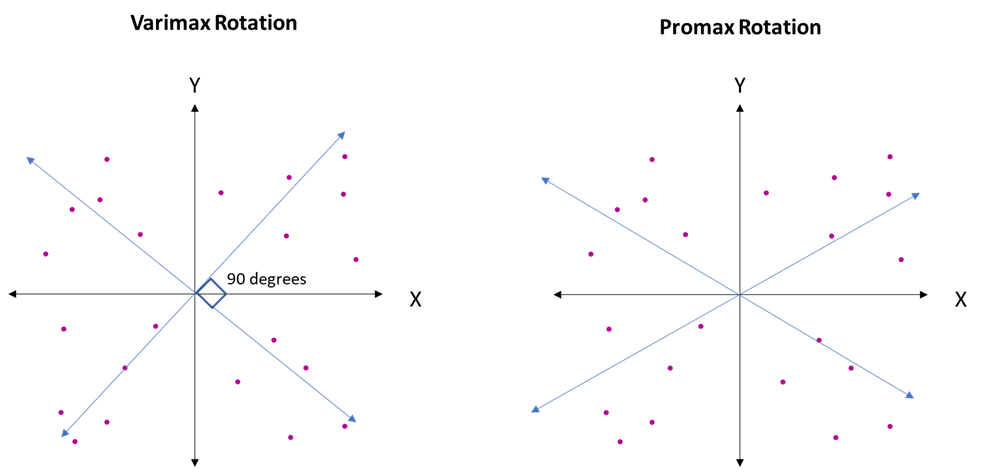



You can try to run one model with one rotation method and run another model with another rotation method. You can then compare the loadings results and see which model result has a better interpretation. The following two figures show the results of the three-factor model with varimax rotation and the results of the three-factor model with promax rotation.

#### **Performing factor analysis with factor rotation**

The implementation of Factor Analysis with factor rotation element is done pretty much same manner as just Factor Analysis without rotation. Below is the example python code for Factor Analysis with Varimax rotation:

In [ ]:
# Create 3-factor object with rotation and fit data
fa3_varimax = FactorAnalyzer(3, rotation="varimax")
fact_res3_varimax = fa3_varimax.fit(df)

In [ ]:
# Loadings
Loadings_varimax = pd.DataFrame(
    fact_res3_varimax.loadings_,
    index=[data.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

print("Factor Loadings (varimax)")
Loadings_varimax

In [ ]:
# Get proportion variance and cumulative proportion variance
variances_varimax = pd.DataFrame(
    fact_res3_varimax.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

print("Factor variances (varimax)")
variances_varimax

We can compare the 3-factor model without rotation to 3-factor model with varimax rotation. The model results of the two different models are very close. In this example, we don’t need rotation to help with factor interpretation.

### **2.5 Factor Analysis vs. Principal Component Analysis**

A lot of people often confuse factor analysis and principal component analysis. Both factor analysis and principal component analysis are dimension reduction methods. Factor analysis has factors, and principal component analysis has principal components. So what is the difference between the two methods?

Principal components from PCA are generated from a linear combination of the variables. The purpose of PCA is to find principal components to explain as much of the total variance of the original variables as possible. Factor analysis is a model to measure factors or latent variables. The purpose of factor analysis is to find latent variables that can best explain the covariance among original variables, not the total variance of the dataset.

## **3. Shiny Application For Linear Regression and Factor Analysis**

In this module, we provide a Shiny application to build a multiple regression model and perform factor analysis. The application also gives a data summary to let you know what variables are available in the application. The purpose of this application is to give you an idea of how linear regression and factor analysis work and provide you with hands-on experience using these analytical tools.

[Click here to access the application](https://worldquantuniversity.shinyapps.io/3FE-Module-1-Lesson-4/?_ga=2.191802473.2100839503.1660164825-1173458961.1656095235). In the linear regression model tab, you choose a dependent variable and independent variable(s) for the regression and press the run button, and the application will generate the result. 

In the factor analysis tab, you select the number of factors and rotation method and then press the run button. The application will generate the result as shown in the note.




## **4. Conclusion**

In this lesson, we first introduced measurement error. We discussed the implications of having measurement error in one or several variables in a linear regression model. We then moved to study factor analysis, especially exploratory factor analysis. We used exploratory factor analysis to measure latent variables and model measurement error. Both factor analysis and principal component analysis are used to reduce dimension for the dataset. We briefly talked about the difference between the two methods.



---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
